In [1]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import datetime
from collections import Counter

In [5]:
# DO NOT USE - for array population only
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [7]:
#data = pd.read_csv('data/location_transfer.csv', index_col='PERSON_ID')
data = pd.read_csv('data/location_transfer.csv')

In [8]:
data[:22]

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME
0,5076351,232202115,2019-10-30 01:14:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
1,5076351,232202115,2019-10-30 04:41:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
2,5076351,232202115,2019-10-30 04:47:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
3,5076351,232202115,2019-10-30 09:06:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
4,5076351,232202115,2019-10-30 10:24:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
5,5076351,232202115,2019-10-30 21:36:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
6,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
7,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
8,5076351,232202115,2019-10-30 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
9,5076351,232202115,2019-10-31 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA


In [9]:
dataset = data[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset['id'] = pd.Categorical((pd.factorize(data.VISIT_OCCURRENCE_ID)[0]))

/var/folders/z1/dhntx3p55px4yc3l3kqz8l2w0000gn/T/ipykernel_45232/2822037342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['id'] = pd.Categorical((pd.factorize(data.VISIT_OCCURRENCE_ID)[0]))


In [10]:
dataset[:22]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
0,232202115,2019-10-30 01:14:00.0000000,VUH EMERGENCY,0
1,232202115,2019-10-30 04:41:00.0000000,VUH EMERGENCY,0
2,232202115,2019-10-30 04:47:00.0000000,VUH EMERGENCY,0
3,232202115,2019-10-30 09:06:00.0000000,VUH EMERGENCY,0
4,232202115,2019-10-30 10:24:00.0000000,VUH EMERGENCY,0
5,232202115,2019-10-30 21:36:00.0000000,VUH EMERGENCY,0
6,232202115,2019-10-30 21:50:00.0000000,VUH 10N TRAUMA,0
7,232202115,2019-10-30 21:50:00.0000000,VUH EMERGENCY,0
8,232202115,2019-10-30 23:59:00.0000000,VUH 10N TRAUMA,0
9,232202115,2019-10-31 23:59:00.0000000,VUH 10N TRAUMA,0


In [11]:
edges = []
for i in range(1, 22):
    if (dataset.CARE_SITE_NAME.values[i] != dataset.CARE_SITE_NAME.values[i-1]) & (dataset.VISIT_OCCURRENCE_ID.values[i] == dataset.VISIT_OCCURRENCE_ID.values[i-1]):
        edges.append((dataset.CARE_SITE_NAME.values[i-1], dataset.CARE_SITE_NAME.values[i]))

In [12]:
edges_df = pd.DataFrame(edges, columns = ['from', 'to'])

In [13]:
edges_df

,from,to
0,VUH EMERGENCY,VUH 10N TRAUMA
1,VUH 10N TRAUMA,VUH EMERGENCY
2,VUH EMERGENCY,VUH 10N TRAUMA
3,VUH 10N TRAUMA,VUH MAIN OR
4,VUH MAIN OR,VUH 10N TRAUMA
5,VUH 10N TRAUMA,VUH MAIN OR
6,VUH MAIN OR,VUH 10N TRAUMA
7,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA


In [14]:
graph = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges).items())
print(*graph.edges(data=True), sep='\n')

('VUH EMERGENCY', 'VUH 10N TRAUMA', {'weight': 2})
('VUH 10N TRAUMA', 'VUH EMERGENCY', {'weight': 1})
('VUH 10N TRAUMA', 'VUH MAIN OR', {'weight': 2})
('VUH 10N TRAUMA', 'ZZZ-VUH10SORTHOTRAUMA', {'weight': 1})
('VUH MAIN OR', 'VUH 10N TRAUMA', {'weight': 2})


In [15]:
edges_weighted = list(Counter(edges).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params = list((x, y, v) for (x,y), v in edges_weighted)
params_df = pd.DataFrame(params, columns = ['from', 'to', 'weight'])

In [16]:
params_df

,from,to,weight
0,VUH EMERGENCY,VUH 10N TRAUMA,2
1,VUH 10N TRAUMA,VUH EMERGENCY,1
2,VUH 10N TRAUMA,VUH MAIN OR,2
3,VUH MAIN OR,VUH 10N TRAUMA,2
4,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA,1


In [17]:
#dataset['ID'] = dataset.index.astype('category').cat.rename_categories(range(0, dataset.index.nunique()+1))
#data['id'] = pd.Categorical((pd.factorize(data.PERSON_ID)[0]))
# site_time = data.iloc[:,0]
# location = data.loc[:,'CARE_SITE_NAME']

In [18]:
# populate graph with columns in dataframe
# i think this does the same thing as 'graph' from above
graph2 = nx.Graph()
graph2 = nx.from_pandas_edgelist(params_df[:22], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())
# graph_small = nx.from_pandas_drataframe(dataset[:300],source='PERSON_ID',
#                                    target='CARE_SITE_NAME',edge_attr=True,
#                                    create_using=nx.DiGraph())
#graph2 = nx.DiGraph.add_weighted_edges_from(edges_weighted)

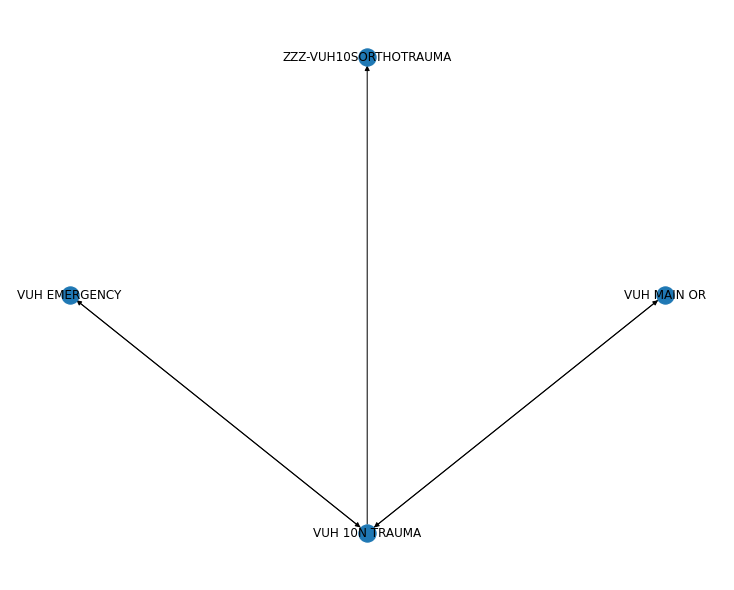

In [19]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph, with_labels=True)

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'labels'

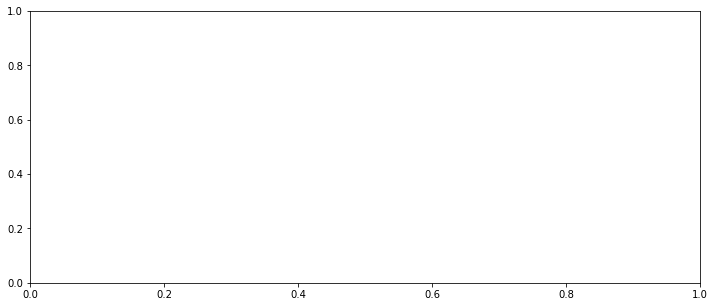

In [20]:
weights = [i['weight'] for i in dict(graph.edges).values()]
labels = [i for i in dict(graph.nodes).keys()]
labels = {i:i for i in dict(graph.nodes).keys()}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, ax = ax, labels=True)
nx.draw_networkx_edges(graph, pos, width=weights, ax=ax)
_ = nx.draw_networkx_labels(graph, pos, labels, ax=ax)

In [21]:
# connections from a single node
graph['VUH EMERGENCY']

AtlasView({'VUH 10N TRAUMA': {'weight': 2}})

In [22]:
total_connections = {}
for x in graph.nodes:
    total_connections[x] = len(graph[x])
s = pd.Series(total_connections, name='transfers')
df2 = s.to_frame().sort_values('transfers', ascending=False)

In [23]:
df2.head()

,transfers
VUH 10N TRAUMA,3
VUH EMERGENCY,1
VUH MAIN OR,1
ZZZ-VUH10SORTHOTRAUMA,0


In [26]:
data2 = pd.read_csv('data/location_transfer.csv')

In [27]:
data2[:22]

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME
0,5076351,232202115,2019-10-30 01:14:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
1,5076351,232202115,2019-10-30 04:41:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
2,5076351,232202115,2019-10-30 04:47:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
3,5076351,232202115,2019-10-30 09:06:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
4,5076351,232202115,2019-10-30 10:24:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
5,5076351,232202115,2019-10-30 21:36:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
6,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
7,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
8,5076351,232202115,2019-10-30 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
9,5076351,232202115,2019-10-31 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA


In [28]:
data2.dtypes

PERSON_ID                int64
VISIT_OCCURRENCE_ID      int64
CARE_SITE_DATETIME      object
VISIT_START_DATETIME    object
VISIT_END_DATETIME      object
CARE_SITE_ID             int64
CARE_SITE_NAME          object
dtype: object

In [29]:
# day
data2['CARE_SITE_DATETIME'] = data2['CARE_SITE_DATETIME'].astype('datetime64[ns]')
data2['VISIT_START_DATETIME'] = data2['VISIT_START_DATETIME'].astype('datetime64[ns]')
data2['VISIT_END_DATETIME'] = data2['VISIT_END_DATETIME'].astype('datetime64[ns]')

In [30]:
data2.dtypes

PERSON_ID                        int64
VISIT_OCCURRENCE_ID              int64
CARE_SITE_DATETIME      datetime64[ns]
VISIT_START_DATETIME    datetime64[ns]
VISIT_END_DATETIME      datetime64[ns]
CARE_SITE_ID                     int64
CARE_SITE_NAME                  object
dtype: object

In [31]:
data2['DURATION'] = data2['VISIT_END_DATETIME']-data2['VISIT_START_DATETIME']
data2['DURATION_HOURS'] = (data2['DURATION'].dt.total_seconds().astype(int))/3600

In [32]:
data2.drop_duplicates()

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667


In [33]:
data2['VSTART_YEAR'] = data2['VISIT_START_DATETIME'].dt.year
data2['VSTART_MONTH'] = data2['VISIT_START_DATETIME'].dt.month
data2['VSTART_DATE'] = data2['VISIT_START_DATETIME'].dt.day
data2['VEND_YEAR'] = data2['VISIT_END_DATETIME'].dt.year
data2['VEND_MONTH'] = data2['VISIT_END_DATETIME'].dt.month
data2['VEND_DATE'] = data2['VISIT_END_DATETIME'].dt.day

In [34]:
data2

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8


In [35]:
preCovid = data2[data2['VISIT_START_DATETIME'] <= datetime.datetime(2020,3,10)]

In [36]:
postCovid = data2[data2['VISIT_START_DATETIME'] >= datetime.datetime(2020,3,10)]

In [37]:
preCovid

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184635,214444397,94052784,2019-02-07 21:29:00,2019-02-06 19:40:00,2019-02-08 17:12:00,4481006,VUH 6CCT NEURO ICU,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184636,214444397,94052784,2019-02-07 23:05:00,2019-02-06 19:40:00,2019-02-08 17:12:00,2991011,ZZZ-VUH10SORTHOTRAUMA,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184637,214444397,94052784,2019-02-07 23:05:00,2019-02-06 19:40:00,2019-02-08 17:12:00,4481006,VUH 6CCT NEURO ICU,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184638,214444397,94052784,2019-02-07 23:59:00,2019-02-06 19:40:00,2019-02-08 17:12:00,2991011,ZZZ-VUH10SORTHOTRAUMA,1 days 21:32:00,45.533333,2019,2,6,2019,2,8


In [38]:
postCovid

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
209,5076607,319061642,2021-07-28 09:59:00,2021-07-28 17:34:00,2021-08-03 16:54:00,25181000,MRI MCE 4,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
210,5076607,319061642,2021-07-28 13:00:00,2021-07-28 17:34:00,2021-08-03 16:54:00,25181000,MRI MCE 4,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
211,5076607,319061642,2021-07-28 13:01:00,2021-07-28 17:34:00,2021-08-03 16:54:00,241016,ONCOLOGY RADIATION CLINIC PRB B,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
212,5076607,319061642,2021-07-28 17:33:00,2021-07-28 17:34:00,2021-08-03 16:54:00,241016,ONCOLOGY RADIATION CLINIC PRB B,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
213,5076607,319061642,2021-07-28 17:34:00,2021-07-28 17:34:00,2021-08-03 16:54:00,1731232,VUH EMERGENCY,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8


## Pre COVID

In [39]:
dataset_pre = preCovid[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset_pre['id'] = pd.Categorical((pd.factorize(preCovid.VISIT_OCCURRENCE_ID)[0]))

/var/folders/z1/dhntx3p55px4yc3l3kqz8l2w0000gn/T/ipykernel_45232/3321052373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_pre['id'] = pd.Categorical((pd.factorize(preCovid.VISIT_OCCURRENCE_ID)[0]))


In [40]:
dataset_pre[:500]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
0,232202115,2019-10-30 01:14:00,VUH EMERGENCY,0
1,232202115,2019-10-30 04:41:00,VUH EMERGENCY,0
2,232202115,2019-10-30 04:47:00,VUH EMERGENCY,0
3,232202115,2019-10-30 09:06:00,VUH EMERGENCY,0
4,232202115,2019-10-30 10:24:00,VUH EMERGENCY,0
...,...,...,...,...
684,222521219,2019-09-15 23:59:00,VUH 8CCT MEDICAL ICU,26
685,222521219,2019-09-16 23:59:00,VUH 8CCT MEDICAL ICU,26
686,222521219,2019-09-17 23:59:00,VUH 8CCT MEDICAL ICU,26
687,222521219,2019-09-18 23:59:00,VUH 8CCT MEDICAL ICU,26


In [41]:
edges_pre = []
for i in range(1, 2496929): #2496929
    if (dataset_pre.CARE_SITE_NAME.values[i] != dataset_pre.CARE_SITE_NAME.values[i-1]) & (dataset_pre.VISIT_OCCURRENCE_ID.values[i] == dataset_pre.VISIT_OCCURRENCE_ID.values[i-1]):
        edges_pre.append((dataset_pre.CARE_SITE_NAME.values[i-1], dataset_pre.CARE_SITE_NAME.values[i]))

In [42]:
edges_df_pre = pd.DataFrame(edges_pre, columns = ['from', 'to'])

In [43]:
edges_df_pre

,from,to
0,VUH EMERGENCY,VUH 10N TRAUMA
1,VUH 10N TRAUMA,VUH EMERGENCY
2,VUH EMERGENCY,VUH 10N TRAUMA
3,VUH 10N TRAUMA,VUH MAIN OR
4,VUH MAIN OR,VUH 10N TRAUMA
...,...,...
607867,VUH 6CCT NEURO ICU,VUH EMERGENCY
607868,VUH EMERGENCY,VUH 6CCT NEURO ICU
607869,VUH 6CCT NEURO ICU,ZZZ-VUH10SORTHOTRAUMA
607870,ZZZ-VUH10SORTHOTRAUMA,VUH 6CCT NEURO ICU


In [44]:
#edges_df_pre['id'].value_counts().mean()

In [45]:
graph_pre = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges_pre).items())
print(*graph_pre.edges(data=True), sep='\n')

('VUH EMERGENCY', 'VUH 10N TRAUMA', {'weight': 8170})
('VUH EMERGENCY', 'VUH HOSPITAL LAB', {'weight': 646})
('VUH EMERGENCY', 'VUH 11S BURN UNIT', {'weight': 1368})
('VUH EMERGENCY', 'VUH 8MCE MEDICINE CARDIAC STEPDOWN', {'weight': 3039})
('VUH EMERGENCY', 'VUH 8N MEDICINE', {'weight': 2954})
('VUH EMERGENCY', 'VUH 7CCT TRANSPLANT/SURGERY', {'weight': 3349})
('VUH EMERGENCY', 'VUH 7S DIALYSIS', {'weight': 1164})
('VUH EMERGENCY', 'VUH 11N HEMATOLOGY / ONCOLOGY', {'weight': 3580})
('VUH EMERGENCY', 'VUH 8CCT MEDICAL ICU', {'weight': 6535})
('VUH EMERGENCY', 'VUH MAIN OR', {'weight': 5237})
('VUH EMERGENCY', 'VUH TRANSITIONAL OBSERVATION', {'weight': 8479})
('VUH EMERGENCY', 'VUH 6N NEUROSCIENCE', {'weight': 2595})
('VUH EMERGENCY', 'ZZZ-VUH 4RW GENERAL SURGERY', {'weight': 1732})
('VUH EMERGENCY', 'ZZZ-VUH 6RW ORTHOPAEDICS', {'weight': 1484})
('VUH EMERGENCY', 'VPH PSYCHIATRIC ASSESSMENT SERVICE', {'weight': 2044})
('VUH EMERGENCY', 'VUH 7N CARDIAC MEDICINE', {'weight': 1547})
('VUH EM

('X-RAY VUH', 'VUH 6CCT NEURO ICU', {'weight': 5})
('X-RAY VUH', 'VUH VASCULAR ACCESS', {'weight': 1})
('X-RAY VUH', 'VUH 5N CARDIAC ICU', {'weight': 6})
('X-RAY VUH', 'VUH 6N NEUROSCIENCE', {'weight': 1})
('X-RAY VUH', 'VUH 8CCT MEDICAL ICU', {'weight': 3})
('X-RAY VUH', 'VUH TRANSITIONAL OBSERVATION', {'weight': 6})
('X-RAY VUH', 'VUH 9S UROLOGY', {'weight': 5})
('X-RAY VUH', 'VUH 10N TRAUMA', {'weight': 3})
('X-RAY VUH', 'VUH 8N MEDICINE', {'weight': 7})
('X-RAY VUH', 'ZZZ-VUH 3MCNA MEDICINE', {'weight': 2})
('X-RAY VUH', 'CT VUH 1', {'weight': 6})
('X-RAY VUH', 'VUH 8S CARDIAC STEPDOWN', {'weight': 2})
('X-RAY VUH', 'VPH 3', {'weight': 13})
('X-RAY VUH', 'MRI VUH 1', {'weight': 1})
('X-RAY VUH', 'MAMMOGRAPHY TVC 1', {'weight': 1})
('X-RAY VUH', 'ZZZ-VUH 6RW ORTHOPAEDICS', {'weight': 2})
('X-RAY VUH', 'VUH GI ENDOSCOPY LAB', {'weight': 1})
('X-RAY VUH', 'EKG TVC 1', {'weight': 1})
('X-RAY VUH', 'VUH 8MCE MEDICINE CARDIAC STEPDOWN', {'weight': 1})
('X-RAY VUH', 'ZZZ-VUH 3 CRC', {'wei

('VUH 5C ADULT VCH MEDICINE', 'VUH 8MCE MEDICINE CARDIAC STEPDOWN', {'weight': 7})
('VUH 5C ADULT VCH MEDICINE', 'VUH 5CCT CARDIAC CATH EP', {'weight': 4})
('VUH 5C ADULT VCH MEDICINE', 'VUH 11N HEMATOLOGY / ONCOLOGY', {'weight': 1})
('VUH 5C ADULT VCH MEDICINE', 'VUH 6S SPINE', {'weight': 1})
('VUH 5C ADULT VCH MEDICINE', 'VUH 7RW MEDICINE SURGERY', {'weight': 4})
('VUH 5C ADULT VCH MEDICINE', 'ONCOLOGY RADIATION TREATMENT PRB B', {'weight': 6})
('VUH 5C ADULT VCH MEDICINE', 'ZZZ-VUH 4RW GENERAL SURGERY', {'weight': 2})
('VUH 5C ADULT VCH MEDICINE', 'VUH 5N CARDIAC ICU', {'weight': 1})
('VUH 5C ADULT VCH MEDICINE', 'VUH 11S BURN UNIT', {'weight': 3})
('VUH 5C ADULT VCH MEDICINE', 'ONCOLOGY RADIATION CT PRB B', {'weight': 1})
('VUH 5C ADULT VCH MEDICINE', 'VUH 9CCT SURGICAL ICU', {'weight': 4})
('VUH 5C ADULT VCH MEDICINE', 'ONCOLOGY RADIATION CLINIC PRB B', {'weight': 1})
('VUH 5C ADULT VCH MEDICINE', 'HS AUDIOLOGY MCE 7', {'weight': 2})
('ONCOLOGY BONE MARROW BIOPSY TVC 3', 'VUH 10CC

In [46]:
edges_weighted_pre = list(Counter(edges_pre).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params_pre = list((x, y, v) for (x,y), v in edges_weighted_pre)
params_df_pre = pd.DataFrame(params_pre, columns = ['from', 'to', 'weight'])

In [47]:
params_df_pre

,from,to,weight
0,VUH EMERGENCY,VUH 10N TRAUMA,8170
1,VUH 10N TRAUMA,VUH EMERGENCY,2862
2,VUH 10N TRAUMA,VUH MAIN OR,4913
3,VUH MAIN OR,VUH 10N TRAUMA,5401
4,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA,1190
...,...,...,...
6467,VUH HOSPITAL LAB,VUH 10S TRAUMA STEPDOWN,2
6468,VCH 8B SURGERY,VCH 7A MEDICINE,1
6469,VUH 11S BURN UNIT,VUH 7CCT ORTHO,2
6470,VUH 7CCT ORTHO,VUH 11S BURN UNIT,1


In [48]:
graph2_pre = nx.Graph()
graph2_pre = nx.from_pandas_edgelist(params_df_pre[:500], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())

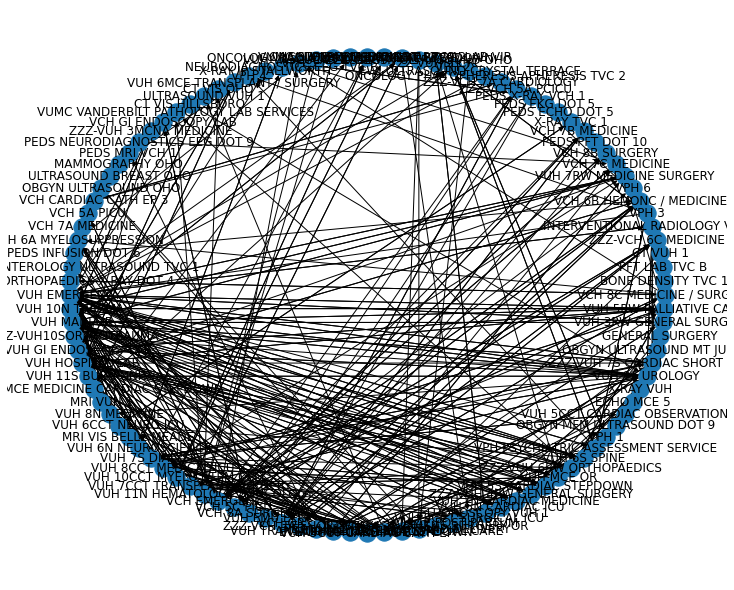

In [49]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph2_pre, with_labels=True)

In [50]:
close_pre = nx.closeness_centrality(graph2_pre)

bet_pre = nx.betweenness_centrality(graph2_pre)

ein_pre = nx.eigenvector_centrality(graph2_pre, 1000)

In [51]:
print(close_pre)

{'VUH EMERGENCY': 0.4278727422400852, 'VUH 10N TRAUMA': 0.3036008796041781, 'VUH MAIN OR': 0.3840904151271463, 'ZZZ-VUH10SORTHOTRAUMA': 0.3058497750086535, 'VUH GI ENDOSCOPY LAB': 0.31518869943639866, 'VUH HOSPITAL LAB': 0.40282653293822657, 'VUH 11S BURN UNIT': 0.3069867630198381, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.3384403248046576, 'MRI VUH 1': 0.27711221225616256, 'VUH 8N MEDICINE': 0.30928628933459346, 'VUH 6CCT NEURO ICU': 0.3104490197456257, 'MRI VIS BELLE MEADE': 0.0, 'VUH 6N NEUROSCIENCE': 0.341237352282382, 'VUH 7S DIALYSIS': 0.3303177570093458, 'VUH 8CCT MEDICAL ICU': 0.3238409382444567, 'VUH 10CCT MYELO STEM CELL': 0.3036008796041781, 'VUH 7CCT TRANSPLANT/SURGERY': 0.3163963189744691, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.30928628933459346, 'VCH EMERGENCY': 0.3069867630198381, 'VCH 5C PICU': 0.26299184475266385, 'VCH 8A SURGERY': 0.26299184475266385, 'VUH EMU EEG': 0.24650578881294463, 'VCH OR': 0.3384403248046576, 'ZZZ-VCH 3A SHORT STAY': 0.2580607476635514, 'PET VUH 1': 

In [86]:
sorted_dict = {}
sorted_keys = sorted(close_pre, key=close_pre.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = close_pre[w]

print(sorted_dict)

{'VUH EMERGENCY': 0.4278727422400852, 'VUH HOSPITAL LAB': 0.40282653293822657, 'VUH MAIN OR': 0.3840904151271463, 'VUH 4E MATERNAL SPECIAL CARE': 0.35441819421603626, 'VUH TRANSITIONAL OBSERVATION': 0.3499128781878663, 'VUH 6N NEUROSCIENCE': 0.341237352282382, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.3384403248046576, 'VCH OR': 0.3384403248046576, 'VUH 5N CARDIAC ICU': 0.3384403248046576, 'VUH 6S SPINE': 0.3384403248046576, 'VUH 5RW PALLIATIVE CARE': 0.3384403248046576, 'VUH 7S DIALYSIS': 0.3303177570093458, 'ZZZ-VUH 6RW ORTHOPAEDICS': 0.3303177570093458, 'VCH 6B HEMONC / MEDICINE': 0.32511590256825373, 'VUH 8CCT MEDICAL ICU': 0.3238409382444567, 'VUH 5CCT CARDIAC CATH EP': 0.31883953379280483, 'VUH 8S CARDIAC STEPDOWN': 0.3176132278936017, 'VUH 9CCT SURGICAL ICU': 0.3176132278936017, 'VUH 7CCT TRANSPLANT/SURGERY': 0.3163963189744691, 'VUH 7N CARDIAC MEDICINE': 0.3163963189744691, 'VUH GI ENDOSCOPY LAB': 0.31518869943639866, 'VUH 9S UROLOGY': 0.31518869943639866, 'VUH 5S CARDIAC STEPDOW

In [88]:
for num in range(5):
    print(num)

0
1
2
3
4


In [52]:
print(bet_pre)

{'VUH EMERGENCY': 0.285239118349566, 'VUH 10N TRAUMA': 0.0008852288931795604, 'VUH MAIN OR': 0.0697454838525955, 'ZZZ-VUH10SORTHOTRAUMA': 0.0024227755877169305, 'VUH GI ENDOSCOPY LAB': 0.009039248806804906, 'VUH HOSPITAL LAB': 0.22786147220155142, 'VUH 11S BURN UNIT': 0.0017100610845100356, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.026804662946160296, 'MRI VUH 1': 0.0, 'VUH 8N MEDICINE': 0.0018910215061687463, 'VUH 6CCT NEURO ICU': 0.024514917673090827, 'MRI VIS BELLE MEADE': 0.0, 'VUH 6N NEUROSCIENCE': 0.05201729888686027, 'VUH 7S DIALYSIS': 0.02153788437600679, 'VUH 8CCT MEDICAL ICU': 0.012637858823582173, 'VUH 10CCT MYELO STEM CELL': 0.026303268107004625, 'VUH 7CCT TRANSPLANT/SURGERY': 0.014118671143807996, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.02715581260370539, 'VCH EMERGENCY': 0.11212995011525678, 'VCH 5C PICU': 0.0033151819476982592, 'VCH 8A SURGERY': 0.01744548286604361, 'VUH EMU EEG': 0.0, 'VCH OR': 0.15893926028362854, 'ZZZ-VCH 3A SHORT STAY': 5.388036599463156e-05, 'PET VUH 1': 0

In [90]:
sorted_dict = {}
sorted_keys = sorted(bet_pre, key=bet_pre.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = bet_pre[w]

print(sorted_dict)

{'VUH EMERGENCY': 0.285239118349566, 'VUH HOSPITAL LAB': 0.22786147220155142, 'VCH OR': 0.15893926028362854, 'VUH 4E MATERNAL SPECIAL CARE': 0.14012233968849624, 'VCH EMERGENCY': 0.11212995011525678, 'VUH MAIN OR': 0.0697454838525955, 'VUH 6N NEUROSCIENCE': 0.05201729888686027, 'VCH 6B HEMONC / MEDICINE': 0.03927505015256962, 'VPH PSYCHIATRIC ASSESSMENT SERVICE': 0.03855482145118241, 'ZZZ-VCH 5A PCICU': 0.031211426556162932, 'VUH TRANSITIONAL OBSERVATION': 0.03025009463723096, 'VUH 5CCT CARDIAC CATH EP': 0.029153758817213427, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.02715581260370539, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.026804662946160296, 'VUH 10CCT MYELO STEM CELL': 0.026303268107004625, 'VUH 6CCT NEURO ICU': 0.024514917673090827, 'PEDS X-RAY VCH 1': 0.022923646623170518, 'VUH 7S DIALYSIS': 0.02153788437600679, 'VCH 8A SURGERY': 0.01744548286604361, 'VCH 8C MEDICINE / SURGERY': 0.0171494907255796, 'VPH 4': 0.01675189560923999, 'VUH 7N CARDIAC MEDICINE': 0.016600794580514378, 'VUH 4N LA

In [53]:
print(ein_pre)

{'VUH EMERGENCY': 0.387281531542274, 'VUH 10N TRAUMA': 0.1448989150870908, 'VUH MAIN OR': 0.36718840462977026, 'ZZZ-VUH10SORTHOTRAUMA': 0.12167237467838364, 'VUH GI ENDOSCOPY LAB': 0.16657479956383722, 'VUH HOSPITAL LAB': 0.25014298418926256, 'VUH 11S BURN UNIT': 0.0938737236625904, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.1504522219781008, 'MRI VUH 1': 0.022576124826446324, 'VUH 8N MEDICINE': 0.14208364522641861, 'VUH 6CCT NEURO ICU': 0.1063485282900951, 'MRI VIS BELLE MEADE': 5.434073859170153e-21, 'VUH 6N NEUROSCIENCE': 0.12425164542198701, 'VUH 7S DIALYSIS': 0.21689860282817766, 'VUH 8CCT MEDICAL ICU': 0.17534817101379652, 'VUH 10CCT MYELO STEM CELL': 0.10646754393492475, 'VUH 7CCT TRANSPLANT/SURGERY': 0.19081502961700006, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.12131428342165633, 'VCH EMERGENCY': 0.012071142692845975, 'VCH 5C PICU': 0.007906255850412193, 'VCH 8A SURGERY': 0.004923646840860803, 'VUH EMU EEG': 0.011213965661369677, 'VCH OR': 0.0293554443253001, 'ZZZ-VCH 3A SHORT STAY': 0.

In [92]:
sorted_dict = {}
sorted_keys = sorted(ein_pre, key=ein_pre.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = ein_pre[w]

print(sorted_dict)

{'VUH EMERGENCY': 0.387281531542274, 'VUH MAIN OR': 0.36718840462977026, 'VUH HOSPITAL LAB': 0.25014298418926256, 'VUH 7S DIALYSIS': 0.21689860282817766, 'VUH TRANSITIONAL OBSERVATION': 0.19745962898160044, 'VUH 7CCT TRANSPLANT/SURGERY': 0.19081502961700006, 'VUH 8CCT MEDICAL ICU': 0.17534817101379652, 'VUH 5RW PALLIATIVE CARE': 0.17467609504831472, 'VUH 9S UROLOGY': 0.17382119342473593, 'VUH 8S CARDIAC STEPDOWN': 0.17108300804861074, 'VUH GI ENDOSCOPY LAB': 0.16657479956383722, 'VUH 7N CARDIAC MEDICINE': 0.15654553867214493, 'VUH 6S SPINE': 0.1564017214929819, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.1504522219781008, 'VUH 5CCT CARDIAC CATH EP': 0.14979402627932642, 'VUH 5N CARDIAC ICU': 0.14550862937901796, 'VUH 10N TRAUMA': 0.1448989150870908, 'VUH 8N MEDICINE': 0.14208364522641861, 'VUH 9CCT SURGICAL ICU': 0.13383588341339134, 'VUH 7RW MEDICINE SURGERY': 0.1305810823656636, 'VUH 5S CARDIAC STEPDOWN': 0.130214932723762, 'ZZZ-VUH 6RW ORTHOPAEDICS': 0.1252190607184586, 'VUH 6N NEUROSCI

In [54]:
edges_df_pre['to'].value_counts()[:20]

VUH MAIN OR                     48780
VUH EMERGENCY                   34898
VUH HOSPITAL LAB                21727
VUH 4N LABOR AND DELIVERY       17649
VUH 4E POST PARTUM              17424
VUH 7S DIALYSIS                 16858
VUH 10N TRAUMA                  16836
VCH OR                          15845
VUH 7CCT TRANSPLANT/SURGERY     15095
VUH 5N CARDIAC ICU              14783
VUH 8CCT MEDICAL ICU            14440
VUH TRANSITIONAL OBSERVATION    13768
VUH 5CCT CARDIAC CATH EP        13435
VUH 6CCT NEURO ICU              13126
VUH 4S WOMENS SURGERY OR        11237
VCH EMERGENCY                   11147
VUH 8S CARDIAC STEPDOWN         10725
VUH 9CCT SURGICAL ICU           10380
VUH 7N CARDIAC MEDICINE         10093
VUH 6N NEUROSCIENCE             10067
Name: to, dtype: int64

In [55]:
edges_df_pre['from'].value_counts()[:20]

VUH EMERGENCY                         85173
VUH MAIN OR                           62920
VCH EMERGENCY                         28759
VUH 4N LABOR AND DELIVERY             20665
VUH HOSPITAL LAB                      19628
VCH OR                                18457
VUH 7S DIALYSIS                       16806
VUH 5N CARDIAC ICU                    15290
VUH 5CCT CARDIAC CATH EP              15145
VUH 10N TRAUMA                        14929
VUH 8CCT MEDICAL ICU                  13760
VUH 4E MATERNAL SPECIAL CARE          12509
VUH 4S WOMENS SURGERY OR              11865
VUH TRANSITIONAL OBSERVATION          10875
VUH 7CCT TRANSPLANT/SURGERY           10771
VUH 6CCT NEURO ICU                    10674
VUH GI ENDOSCOPY LAB                   8986
VUH 9CCT SURGICAL ICU                  8125
VUH 7N CARDIAC MEDICINE                7859
VPH PSYCHIATRIC ASSESSMENT SERVICE     7545
Name: from, dtype: int64

In [56]:
length_pre = []
for i in range(1, 2496929):
    if (preCovid.VISIT_OCCURRENCE_ID.values[i] != preCovid.VISIT_OCCURRENCE_ID.values[i-1]):
        length_pre.append((preCovid.VISIT_OCCURRENCE_ID.values[i-1], preCovid.DURATION_HOURS.values[i-1]))

In [57]:
length_df_pre = pd.DataFrame(length_pre, columns = ['id', 'length'])

In [58]:
length_df_pre

,id,length
0,232202115,108.000000
1,238622128,25.166667
2,235743585,85.633333
3,48529411,209.250000
4,57462957,44.400000
...,...,...
279413,49808511,133.983333
279414,48138705,30.200000
279415,49808511,133.983333
279416,48138705,30.200000


In [59]:
# average length of stay
length_df_pre['length'].mean()

142.04862953237605

In [60]:
# total transfers
params_df_pre['weight'].sum()

607872

## COVID

In [61]:
dataset_covid = postCovid[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset_covid['id'] = pd.Categorical((pd.factorize(postCovid.VISIT_OCCURRENCE_ID)[0]))

/var/folders/z1/dhntx3p55px4yc3l3kqz8l2w0000gn/T/ipykernel_45232/354352384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_covid['id'] = pd.Categorical((pd.factorize(postCovid.VISIT_OCCURRENCE_ID)[0]))


In [62]:
dataset_covid[:500]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
209,319061642,2021-07-28 09:59:00,MRI MCE 4,0
210,319061642,2021-07-28 13:00:00,MRI MCE 4,0
211,319061642,2021-07-28 13:01:00,ONCOLOGY RADIATION CLINIC PRB B,0
212,319061642,2021-07-28 17:33:00,ONCOLOGY RADIATION CLINIC PRB B,0
213,319061642,2021-07-28 17:34:00,VUH EMERGENCY,0
...,...,...,...,...
2047,271031052,2020-08-18 10:16:00,VUH 6N NEUROSCIENCE,30
2048,294692014,2021-04-05 05:44:00,VUH MAIN OR,31
2049,294692014,2021-04-05 05:50:00,VUH MAIN OR,31
2050,294692014,2021-04-05 18:39:00,VUH 6CCT NEURO ICU,31


In [63]:
edges_covid = []
for i in range(1, 1688194):
    if (dataset_covid.CARE_SITE_NAME.values[i] != dataset_covid.CARE_SITE_NAME.values[i-1]) & (dataset_covid.VISIT_OCCURRENCE_ID.values[i] == dataset_covid.VISIT_OCCURRENCE_ID.values[i-1]):
        edges_covid.append((dataset_covid.CARE_SITE_NAME.values[i-1], dataset_covid.CARE_SITE_NAME.values[i]))

In [65]:
edges_df_covid = pd.DataFrame(edges_covid, columns = ['from', 'to'])

In [66]:
edges_df_covid

,from,to
0,MRI MCE 4,ONCOLOGY RADIATION CLINIC PRB B
1,ONCOLOGY RADIATION CLINIC PRB B,VUH EMERGENCY
2,VUH EMERGENCY,VUH 11N HEMATOLOGY / ONCOLOGY
3,VUH 11N HEMATOLOGY / ONCOLOGY,VUH EMERGENCY
4,VUH EMERGENCY,VUH 11N HEMATOLOGY / ONCOLOGY
...,...,...
431226,VUH 11S BURN UNIT,VUH MAIN OR
431227,VUH MAIN OR,VUH 11S BURN UNIT
431228,VUH 11S BURN UNIT,VUH MAIN OR
431229,VUH MAIN OR,VUH 11S BURN UNIT


In [67]:
#edges_df_covid['id'].value_counts().mean()

In [68]:
graph_covid = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges_covid).items())
print(*graph.edges(data=True), sep='\n')

('VUH EMERGENCY', 'VUH 10N TRAUMA', {'weight': 2})
('VUH 10N TRAUMA', 'VUH EMERGENCY', {'weight': 1})
('VUH 10N TRAUMA', 'VUH MAIN OR', {'weight': 2})
('VUH 10N TRAUMA', 'ZZZ-VUH10SORTHOTRAUMA', {'weight': 1})
('VUH MAIN OR', 'VUH 10N TRAUMA', {'weight': 2})


In [69]:
edges_weighted_covid = list(Counter(edges_covid).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params_covid = list((x, y, v) for (x,y), v in edges_weighted_covid)
params_df_covid = pd.DataFrame(params_covid, columns = ['from', 'to', 'weight'])

In [70]:
params_df_covid

,from,to,weight
0,MRI MCE 4,ONCOLOGY RADIATION CLINIC PRB B,1
1,ONCOLOGY RADIATION CLINIC PRB B,VUH EMERGENCY,59
2,VUH EMERGENCY,VUH 11N HEMATOLOGY / ONCOLOGY,2427
3,VUH 11N HEMATOLOGY / ONCOLOGY,VUH EMERGENCY,868
4,VUH 11N HEMATOLOGY / ONCOLOGY,VUH HOSPITAL LAB,320
...,...,...,...
6296,PEDS UROLOGY ULTRASOUND DOT 4,VCH 6B HEMONC / MEDICINE,1
6297,ULTRASOUND VIS OHO NORTH,CT VIS OHO,1
6298,VUH 8N MEDICINE,VPH 4,1
6299,AFT MCE 5,VUH 6N NEUROSCIENCE,1


In [71]:
graph2_covid = nx.Graph()
graph2_covid = nx.from_pandas_edgelist(params_df_covid[:500], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())

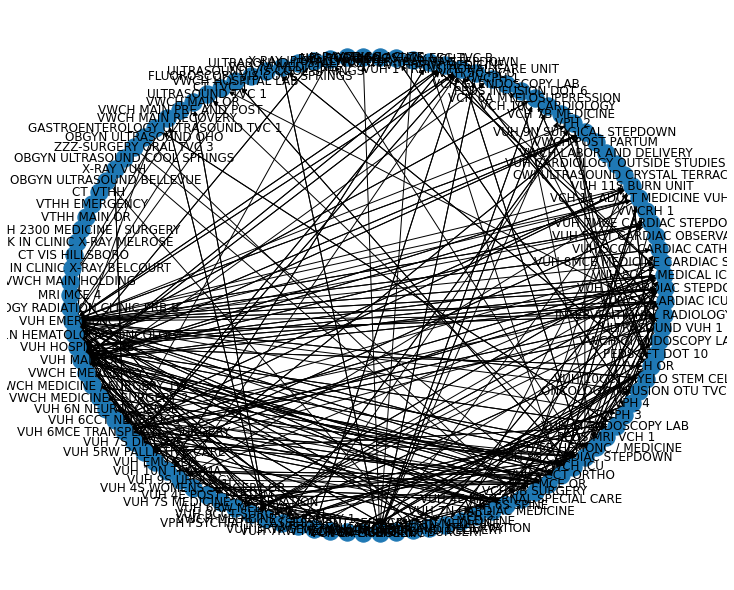

In [72]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph2_covid, with_labels=True)

In [73]:
close_covid = nx.closeness_centrality(graph2_covid)

bet_covid = nx.betweenness_centrality(graph2_covid)

ein_covid = nx.eigenvector_centrality(graph2_covid, 1000)

In [74]:
print(close_covid)

{'MRI MCE 4': 0.0, 'ONCOLOGY RADIATION CLINIC PRB B': 0.2385975170924793, 'VUH EMERGENCY': 0.4209920634920635, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.33950972862263185, 'VUH HOSPITAL LAB': 0.4172828823159219, 'VUH MAIN OR': 0.39141824085005905, 'VWCH EMERGENCY': 0.052521008403361345, 'VWCH MEDICINE / SURGERY 1W': 0.052521008403361345, 'VWCH MEDICINE / SURGERY 2': 0.03881987577639751, 'VUH 6N NEUROSCIENCE': 0.3075429035250463, 'VUH 6CCT NEURO ICU': 0.33950972862263185, 'VUH 6MCE TRANSPLANT / SURGERY': 0.3804145152036718, 'VUH 7S DIALYSIS': 0.3168000477783086, 'VUH 5RW PALLIATIVE CARE': 0.3200108590733591, 'VUH EMU EEG': 0.0, 'VUH 10N TRAUMA': 0.3547685928303906, 'VUH 9S UROLOGY': 0.32328742077035594, 'VUH 4S WOMENS SURGERY OR': 0.32439456947162426, 'VUH 4E POST PARTUM': 0.24413199558173784, 'VUH 7S MEDICINE OBSERVATION': 0.31365302743614004, 'VUH 6RW MEDICINE': 0.31365302743614004, 'VUH 9CCT SURGICAL ICU': 0.2905620070113935, 'VWCH MEDICINE / SURGERY 1': 0.05952380952380952, 'VPH PSYCHIATRI

In [89]:
sorted_dict = {}
sorted_keys = sorted(close_covid, key=close_covid.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = close_covid[w]

print(sorted_dict)

{'VUH EMERGENCY': 0.4209920634920635, 'VUH HOSPITAL LAB': 0.4172828823159219, 'VUH MAIN OR': 0.39141824085005905, 'VUH 6MCE TRANSPLANT / SURGERY': 0.3804145152036718, 'VUH MCE OR': 0.3804145152036718, 'VUH 8CCT MEDICAL ICU': 0.3729260404949381, 'VUH 10N TRAUMA': 0.3547685928303906, 'VUH 6S SPINE': 0.35213090812533193, 'VUH 11S BURN UNIT': 0.35082671957671957, 'VUH 5N CARDIAC ICU': 0.3495321560358461, 'VUH 8N MEDICINE': 0.3482471113445378, 'VUH 5S CARDIAC STEPDOWN': 0.34444805194805195, 'VUH 9N SURGICAL STEPDOWN': 0.34444805194805195, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.33950972862263185, 'VUH 6CCT NEURO ICU': 0.33950972862263185, 'VUH 7MCE CARDIAC STEPDOWN': 0.333532444668008, 'VUH 8S CARDIAC STEPDOWN': 0.3312000499500499, 'VUH 4S WOMENS SURGERY OR': 0.32439456947162426, 'VUH 9S UROLOGY': 0.32328742077035594, 'VUH 7CCT ORTHO': 0.32109564164648907, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.32109564164648907, 'VUH 5RW PALLIATIVE CARE': 0.3200108590733591, 'VPH 3': 0.3178631351869607, 'VCH O

In [75]:
print(bet_covid)

{'MRI MCE 4': 0.0, 'ONCOLOGY RADIATION CLINIC PRB B': 0.01270913770913771, 'VUH EMERGENCY': 0.26767791840312943, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.0028771294913212215, 'VUH HOSPITAL LAB': 0.2490273288746176, 'VUH MAIN OR': 0.04520693560092619, 'VWCH EMERGENCY': 0.06603925353925355, 'VWCH MEDICINE / SURGERY 1W': 0.0008848133848133851, 'VWCH MEDICINE / SURGERY 2': 0.0, 'VUH 6N NEUROSCIENCE': 0.006354568854568855, 'VUH 6CCT NEURO ICU': 0.009752784380220302, 'VUH 6MCE TRANSPLANT / SURGERY': 0.0583032712537219, 'VUH 7S DIALYSIS': 0.0012048466158235066, 'VUH 5RW PALLIATIVE CARE': 0.0033318504653492365, 'VUH EMU EEG': 0.0, 'VUH 10N TRAUMA': 0.005824853894706837, 'VUH 9S UROLOGY': 0.0010337476855334, 'VUH 4S WOMENS SURGERY OR': 0.06595881595881596, 'VUH 4E POST PARTUM': 0.0, 'VUH 7S MEDICINE OBSERVATION': 0.0005648346050131766, 'VUH 6RW MEDICINE': 0.01115973672088223, 'VUH 9CCT SURGICAL ICU': 0.0008631141443641443, 'VWCH MEDICINE / SURGERY 1': 0.03736325611325611, 'VPH PSYCHIATRIC ASSESSMENT 

In [91]:
sorted_dict = {}
sorted_keys = sorted(bet_covid, key=bet_covid.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = bet_covid[w]

print(sorted_dict)

{'VUH EMERGENCY': 0.26767791840312943, 'VUH HOSPITAL LAB': 0.2490273288746176, 'VUH MCE OR': 0.06862560755770342, 'VWCH EMERGENCY': 0.06603925353925355, 'VUH 4S WOMENS SURGERY OR': 0.06595881595881596, 'VUH 6MCE TRANSPLANT / SURGERY': 0.0583032712537219, 'VCH OR': 0.05548333531479105, 'VUH 11S BURN UNIT': 0.049155654608703074, 'VUH MAIN OR': 0.04520693560092619, 'VCH EMERGENCY': 0.04259580844402272, 'VWCH MEDICINE / SURGERY 1': 0.03736325611325611, 'VPH 1': 0.03636153742508785, 'VUH 8CCT MEDICAL ICU': 0.027686657232675833, 'VTHH 2300 MEDICINE / SURGERY': 0.026866151866151867, 'VUH 7MCE CARDIAC STEPDOWN': 0.024836860570111162, 'VUH 8S CARDIAC STEPDOWN': 0.024661126250024968, 'VCH 6A MYELOSUPPRESSION': 0.022007173354584672, 'VUH 4E MATERNAL SPECIAL CARE': 0.019063706563706564, 'VPH 4': 0.017545447232947233, 'VCH 8B SURGERY': 0.015479864133309915, 'VUH 6S SPINE': 0.014686515249178717, 'VCH 7C MEDICINE': 0.01456495630602774, 'ONCOLOGY RADIATION CLINIC PRB B': 0.01270913770913771, 'VTHH MAI

In [76]:
print(ein_covid)

{'MRI MCE 4': 8.61814396054184e-20, 'ONCOLOGY RADIATION CLINIC PRB B': 0.009996077791763026, 'VUH EMERGENCY': 0.3929432183973259, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.1135806609200913, 'VUH HOSPITAL LAB': 0.24377326693837625, 'VUH MAIN OR': 0.33294791694958303, 'VWCH EMERGENCY': 3.9083331511772624e-08, 'VWCH MEDICINE / SURGERY 1W': 3.9083331511772624e-08, 'VWCH MEDICINE / SURGERY 2': 3.1712655320326314e-08, 'VUH 6N NEUROSCIENCE': 0.05141044790566347, 'VUH 6CCT NEURO ICU': 0.16544059710038186, 'VUH 6MCE TRANSPLANT / SURGERY': 0.24119489570462496, 'VUH 7S DIALYSIS': 0.11479073465603105, 'VUH 5RW PALLIATIVE CARE': 0.13407093133683654, 'VUH EMU EEG': 8.61814396054184e-20, 'VUH 10N TRAUMA': 0.13082390160633559, 'VUH 9S UROLOGY': 0.13849946817583847, 'VUH 4S WOMENS SURGERY OR': 0.05515440977853914, 'VUH 4E POST PARTUM': 0.0062241542714605745, 'VUH 7S MEDICINE OBSERVATION': 0.10197605242882787, 'VUH 6RW MEDICINE': 0.10857063828035017, 'VUH 9CCT SURGICAL ICU': 0.10801513322603215, 'VWCH MEDICINE

In [93]:
sorted_dict = {}
sorted_keys = sorted(ein_covid, key=ein_covid.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = ein_covid[w]

print(sorted_dict)

{'VUH EMERGENCY': 0.3929432183973259, 'VUH MAIN OR': 0.33294791694958303, 'VUH 8S CARDIAC STEPDOWN': 0.2500929801343992, 'VUH HOSPITAL LAB': 0.24377326693837625, 'VUH 6MCE TRANSPLANT / SURGERY': 0.24119489570462496, 'VUH 8CCT MEDICAL ICU': 0.2087441496379796, 'VUH 5N CARDIAC ICU': 0.18752489526936647, 'VUH MCE OR': 0.18743206402404294, 'VUH 6S SPINE': 0.17977301947236082, 'VUH 7MCE CARDIAC STEPDOWN': 0.17457160080646733, 'INTERVENTIONAL RADIOLOGY VUH 1': 0.16897686814870844, 'VUH 6CCT NEURO ICU': 0.16544059710038186, 'VUH 5S CARDIAC STEPDOWN': 0.1471540040152563, 'VUH 11S BURN UNIT': 0.14005758219082176, 'VUH 9S UROLOGY': 0.13849946817583847, 'VUH 8N MEDICINE': 0.1382710330087899, 'VUH 5RW PALLIATIVE CARE': 0.13407093133683654, 'VUH 10N TRAUMA': 0.13082390160633559, 'VUH 4RW MEDICINE': 0.12339156467144329, 'VUH 1 TRANSITIONAL CARE UNIT': 0.12178941372950129, 'VUH 7CCT ORTHO': 0.11832741218412256, 'VUH 7S DIALYSIS': 0.11479073465603105, 'VUH 9N SURGICAL STEPDOWN': 0.11421830083447511, '

In [77]:
edges_df_covid['to'].value_counts()[:20]

VUH MAIN OR                      33641
VUH EMERGENCY                    22601
VUH HOSPITAL LAB                 15266
VUH 4E POST PARTUM               11484
VUH 7S DIALYSIS                  11039
VUH 10N TRAUMA                   10426
VCH OR                           10095
VUH 8S CARDIAC STEPDOWN           9609
VUH 7CCT ORTHO                    9535
VUH 6MCE TRANSPLANT / SURGERY     8954
VUH 5N CARDIAC ICU                8916
VUH 4N LABOR AND DELIVERY         8800
VUH 6CCT NEURO ICU                8521
VUH 5CCT CARDIAC CATH EP          8401
VUH 8CCT MEDICAL ICU              8370
VUH 4S WOMENS SURGERY OR          8146
VUH 7N CARDIAC MEDICINE           7686
VUH 8N MEDICINE                   6985
VUH 6N NEUROSCIENCE               6886
VUH 9CCT SURGICAL ICU             6831
Name: to, dtype: int64

In [78]:
edges_df_covid['from'].value_counts()[:20]

VUH EMERGENCY                    54252
VUH MAIN OR                      40910
VUH HOSPITAL LAB                 15397
VCH EMERGENCY                    14635
VCH OR                           11488
VUH 7S DIALYSIS                  11009
VUH 4N LABOR AND DELIVERY         9851
VUH 4E MATERNAL SPECIAL CARE      9734
VUH 10N TRAUMA                    9628
VUH 5CCT CARDIAC CATH EP          9573
VUH 5N CARDIAC ICU                9191
VUH 4S WOMENS SURGERY OR          8750
VUH 8CCT MEDICAL ICU              8055
VUH 6MCE TRANSPLANT / SURGERY     7685
VWCH EMERGENCY                    7364
VUH 6CCT NEURO ICU                7123
VUH 7N CARDIAC MEDICINE           5985
VUH 7CCT ORTHO                    5914
VCH 5A PICU                       5884
VUH 9CCT SURGICAL ICU             5535
Name: from, dtype: int64

In [79]:
length_covid = []
for i in range(1, 1688194):
    if (postCovid.VISIT_OCCURRENCE_ID.values[i] != postCovid.VISIT_OCCURRENCE_ID.values[i-1]):
        length_covid.append((postCovid.VISIT_OCCURRENCE_ID.values[i-1], postCovid.DURATION_HOURS.values[i-1]))

In [80]:
length_df_covid = pd.DataFrame(length_covid, columns = ['id', 'length'])

In [81]:
length_df_covid[:20]

,id,length
0,319061642,143.333333
1,318092955,166.483333
2,268811298,49.216667
3,290531476,51.066667
4,298711305,232.383333
5,245931660,113.466667
6,245643455,20.083333
7,293502319,24.783333
8,294552399,48.750000
9,278651514,424.216667


In [82]:
# average length of stay
length_df_covid['length'].mean()

139.48021910839117

In [83]:
# total transfers
params_df_covid['weight'].sum()

431231